<a name='top'></a>
# Python pandas 

In [2]:
# conventional way to import pandas
import pandas as pd
import os
myDataFolder=os.path.join(os.environ['BUG_FREE_EUREKA_BASE'],'data','exercise05')+os.sep
%matplotlib inline

## How do I read a tabular data file into pandas?

In [3]:
# read a dataset of BEL (Biological Expression Language) nodes into a dataframe
pathToFile = os.path.join(myDataFolder,'nodes_in_Alzheimer_BEL_disease_network.tsv')

read the data

In [4]:
df = pd.read_table(pathToFile)

Pandas documentation for [**`read_table`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

It's always smart to get a first impression what in the table/dataFrame by size (number of elements), shape (dimensions), head and describe

In [5]:
df.size,df.shape

(166978, (11927, 14))

In [6]:
# examine the first 10 rows
df.head(10)

,node_id,BEL,aminoacid_Code_1,aminoacid_Code_2,function,list,modification,namespace,node_id.1,p_modType,position,undefined_namespace,valid_NSV,value
0,1,"a(CHEBI:""gamma-secretase inhibitor"")",NaN,NaN,a,NaN,NaN,CHEBI,1,NaN,NaN,NaN,NaN,gamma-secretase inhibitor
1,2,"complex(SCOMP:""gamma Secretase Complex"")",NaN,NaN,complex,NaN,NaN,SCOMP,2,NaN,NaN,NaN,NaN,"""gamma Secretase Complex"""
2,3,"p(HGNC:""BACE1"")",NaN,NaN,p,NaN,NaN,HGNC,3,NaN,NaN,NaN,True,BACE1
3,4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",NaN,NaN,reaction,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
4,5,"p(HGNC:""APP"")",NaN,NaN,p,NaN,NaN,HGNC,5,NaN,NaN,NaN,True,APP
5,6,"a(ADO:""Abeta_42"")",NaN,NaN,a,NaN,NaN,ADO,6,NaN,NaN,NaN,True,Abeta_42
6,7,"path(MESHD:""Alzheimer Disease"")",NaN,NaN,path,NaN,NaN,MESHD,7,NaN,NaN,NaN,True,Alzheimer Disease
7,8,"p(HGNC:""CLSTN1"")",NaN,NaN,p,NaN,NaN,HGNC,8,NaN,NaN,NaN,True,CLSTN1
8,9,"complex(p(HGNC:CLSTN1),p(HGNC:KLC1))",NaN,NaN,complex,True,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
9,10,"p(HGNC:""KLC1"")",NaN,NaN,p,NaN,NaN,HGNC,10,NaN,NaN,NaN,True,KLC1


We already see here that the first columns looks useless because we have already an index. But first let's check all column names

In [7]:
df.columns

Index(['node_id', 'BEL', 'aminoacid_Code_1', 'aminoacid_Code_2', 'function',
       'list', 'modification', 'namespace', 'node_id.1', 'p_modType',
       'position', 'undefined_namespace', 'valid_NSV', 'value'],
      dtype='object')

Let's set the `index_id`

In [8]:
df.set_index('node_id', inplace=True)

Let's check that with `columns`

In [9]:
df.columns

Index(['BEL', 'aminoacid_Code_1', 'aminoacid_Code_2', 'function', 'list',
       'modification', 'namespace', 'node_id.1', 'p_modType', 'position',
       'undefined_namespace', 'valid_NSV', 'value'],
      dtype='object')

Let's change also the order of the columns because most interesting should be left.

In [10]:
df = df[['BEL', 'function', 'namespace', 'value', 'valid_NSV', 
       'aminoacid_Code_2', 'aminoacid_Code_1', 'undefined_namespace',  
       'modification', 'p_modType', 'list', 'position']].copy(deep=True)
# deep copy because later we have problems to change our data frame

In [11]:
df.head(1)

,BEL,function,namespace,value,valid_NSV,aminoacid_Code_2,aminoacid_Code_1,undefined_namespace,modification,p_modType,list,position
node_id,,,,,,,,,,,,
1,"a(CHEBI:""gamma-secretase inhibitor"")",a,CHEBI,gamma-secretase inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We saw in a session before that `describe` gives us usefull information. That works here also?

In [12]:
df.describe()

/home/ceb/projects/pybel/virtualenvs/pybel_0.1_py3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,position
count,130.000000
mean,2595.946154
std,24114.045581
min,4.000000
25%,NaN
50%,NaN
75%,NaN
max,275341.000000


That looks not so good. Why that happens? Most of the columns are text and the one with integers have a lot of NaN (not a number). The category datatype make perhaps sense here. Do it later.

## How do I select a pandas Series from a DataFrame?

In [13]:
# select the 'namespace' Series using bracket notation
df['namespace']

# or equivalently, use dot notation, 
df.namespace

node_id
1            CHEBI
2            SCOMP
3             HGNC
4              NaN
5             HGNC
6              ADO
7            MESHD
8             HGNC
9              NaN
10            HGNC
11          MESHPP
12             NaN
13            HGNC
14            HGNC
15            HGNC
16            HGNC
17             NaN
18             ADO
19           CHEBI
20           CHEBI
21           CHEBI
22           CHEBI
23           CHEBI
24            HGNC
25            HGNC
26             NaN
27            HGNC
28            HGNC
29            HGNC
30            HGNC
           ...    
11898         HGNC
11899         NIFT
11900        dbSNP
11901         NIFT
11902         NIFT
11903         GOBP
11904         NIFT
11905        dbSNP
11906        dbSNP
11907         HGNC
11908         NIFT
11909         NIFT
11910          NaN
11911    UNDEFINED
11912         BRCO
11913          NaN
11914         HGNC
11915         NIFT
11916         NIFT
11917        dbSNP
11918         NIFT
1191

**Bracket notation** will always work, whereas **dot notation** has limitations:

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

Check the results: many repetitions. Let's analyse that.

In [14]:
namespace_distribution = df.namespace.value_counts()
namespace_distribution

HGNC         7636
MGI          1079
RGD           636
GOBP          612
CHEBI         339
UNDEFINED     296
dbSNP         161
MESHD         124
SCHEM          79
SFAM           78
PMIBP          32
MESHPP         26
GOCC           25
PMICHEM        21
NIFT           20
ADO            15
PTS            14
SCOMP           9
BRCO            9
PMIPFAM         5
CHEBIID         5
MESHCS          4
SDIS            3
CHEMBL          3
PMIDIS          2
PMICOMP         2
Name: namespace, dtype: int64

## How do I plot my results?

plot this as bar plot

<class 'pandas.core.series.Series'>


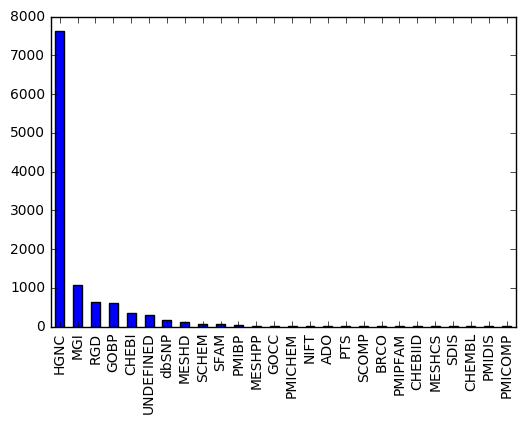

In [15]:
namespace_distribution.plot(kind='bar')
print(type(namespace_distribution))

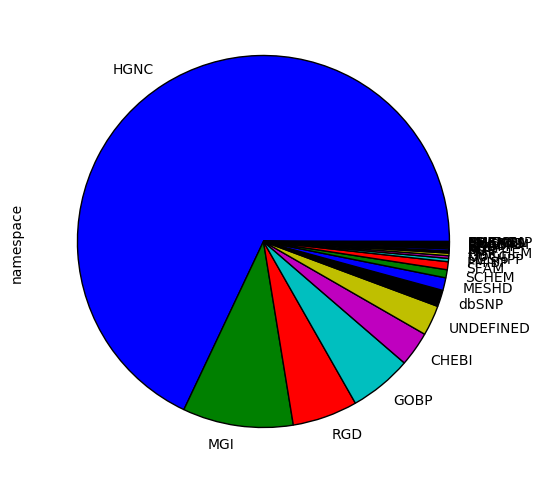

In [16]:
namespace_distribution.plot(kind='pie',figsize=(6,6))

## How do I create new columns?

Let's create a new 'simpleBEL' Series with a simple BEL object name in the schema `function(namespace:value)`.

In [17]:
#(must use bracket notation to define the Series name)
df['simpleBEL'] = df.function + "(" + df.namespace + ':"' + df.value + '")'
df.loc[:,['BEL','simpleBEL']].head(1)

,BEL,simpleBEL
node_id,,
1,"a(CHEBI:""gamma-secretase inhibitor"")","a(CHEBI:""gamma-secretase inhibitor"")"


In [18]:
df2 = df.loc[(df.BEL!=df.simpleBEL),['BEL','simpleBEL']]
df2.dropna().head()

,BEL,simpleBEL
node_id,,
2,"complex(SCOMP:""gamma Secretase Complex"")","complex(SCOMP:""""gamma Secretase Complex"""")"
29,"g(HGNC:""APP"",sub(G,275341,C))","g(HGNC:""APP"")"
30,"p(HGNC:""APP"",sub(V,717,L))","p(HGNC:""APP"")"
31,"p(HGNC:""PSEN2"",sub(N,141,I))","p(HGNC:""PSEN2"")"
32,"g(HGNC:""APP"",sub(G,717,C))","g(HGNC:""APP"")"


[<a href="#top">Back to top</a>]

## Why do some pandas commands end with parentheses (and others don't)?

**Methods** end with parentheses, while **attributes** don't:

In [19]:
# example method: show the first 5 rows
df.head()

,BEL,function,namespace,value,valid_NSV,aminoacid_Code_2,aminoacid_Code_1,undefined_namespace,modification,p_modType,list,position,simpleBEL
node_id,,,,,,,,,,,,,
1,"a(CHEBI:""gamma-secretase inhibitor"")",a,CHEBI,gamma-secretase inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"a(CHEBI:""gamma-secretase inhibitor"")"
2,"complex(SCOMP:""gamma Secretase Complex"")",complex,SCOMP,"""gamma Secretase Complex""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"complex(SCOMP:""""gamma Secretase Complex"""")"
3,"p(HGNC:""BACE1"")",p,HGNC,BACE1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p(HGNC:""BACE1"")"
4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",reaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"p(HGNC:""APP"")",p,HGNC,APP,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p(HGNC:""APP"")"


In [20]:
# example method: calculate summary statistics
df.describe()

/home/ceb/projects/pybel/virtualenvs/pybel_0.1_py3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,position
count,130.000000
mean,2595.946154
std,24114.045581
min,4.000000
25%,NaN
50%,NaN
75%,NaN
max,275341.000000


In [21]:
# example attribute: number of rows and columns
df.shape

(11927, 13)

In [22]:
# example attribute: data type of each column
df.dtypes

BEL                     object
function                object
namespace               object
value                   object
valid_NSV               object
aminoacid_Code_2        object
aminoacid_Code_1        object
undefined_namespace     object
modification            object
p_modType               object
list                    object
position               float64
simpleBEL               object
dtype: object

In [23]:
# use an optional parameter to the describe method to summarize only 'object' columns
df.describe(include=['object'])

,BEL,function,namespace,value,valid_NSV,aminoacid_Code_2,aminoacid_Code_1,undefined_namespace,modification,p_modType,list,simpleBEL
count,11927,11927,11235,11235,10247,54,149,1,270,211,672,11235
unique,11927,12,26,10205,1,15,17,1,2,6,1,10948
top,"p(HGNC:""ADM"")",p,HGNC,MAPT,True,A,S,"""HPA axis""",pmod,P,True,"p(HGNC:""MAPT"")"
freq,1,8988,7636,32,10247,12,45,1,211,181,672,30


Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

[<a href="#top">Back to top</a>]

## How do I rename columns in a pandas DataFrame?

In [24]:
# rename two of the columns by using the 'rename' method
df.rename(columns={'aminoacid_Code_2':'aa2', 'aminoacid_Code_1':'aa1'}, inplace=True)
df.columns

Index(['BEL', 'function', 'namespace', 'value', 'valid_NSV', 'aa2', 'aa1',
       'undefined_namespace', 'modification', 'p_modType', 'list', 'position',
       'simpleBEL'],
      dtype='object')

Documentation for [**`rename`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [25]:
# replace all of the column names by overwriting the 'columns' attribute
df_cols = ['BEL', 'func', 'ns', 'val', 'ns_val_ok', 'aa2', 'aa1',
       'uns', 'mod', 'pmodT', 'isList', 'pos','sBEL']
df.columns = df_cols
df.columns

Index(['BEL', 'func', 'ns', 'val', 'ns_val_ok', 'aa2', 'aa1', 'uns', 'mod',
       'pmodT', 'isList', 'pos', 'sBEL'],
      dtype='object')

In [26]:
df.head()

,BEL,func,ns,val,ns_val_ok,aa2,aa1,uns,mod,pmodT,isList,pos,sBEL
node_id,,,,,,,,,,,,,
1,"a(CHEBI:""gamma-secretase inhibitor"")",a,CHEBI,gamma-secretase inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"a(CHEBI:""gamma-secretase inhibitor"")"
2,"complex(SCOMP:""gamma Secretase Complex"")",complex,SCOMP,"""gamma Secretase Complex""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"complex(SCOMP:""""gamma Secretase Complex"""")"
3,"p(HGNC:""BACE1"")",p,HGNC,BACE1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p(HGNC:""BACE1"")"
4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",reaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"p(HGNC:""APP"")",p,HGNC,APP,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"p(HGNC:""APP"")"


[<a href="#top">Back to top</a>]

## How do I remove columns from a pandas DataFrame?

In [27]:
# remove a single column (axis=1 refers to columns)
df.drop('sBEL', axis=1, inplace=True)
df.head()

,BEL,func,ns,val,ns_val_ok,aa2,aa1,uns,mod,pmodT,isList,pos
node_id,,,,,,,,,,,,
1,"a(CHEBI:""gamma-secretase inhibitor"")",a,CHEBI,gamma-secretase inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"complex(SCOMP:""gamma Secretase Complex"")",complex,SCOMP,"""gamma Secretase Complex""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"p(HGNC:""BACE1"")",p,HGNC,BACE1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",reaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"p(HGNC:""APP"")",p,HGNC,APP,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [28]:
# remove multiple columns at once
columns_to_remove = ['val', 'ns_val_ok', 'aa2', 'aa1',
                     'uns', 'mod', 'pmodT', 'isList', 'pos']
df.drop(columns_to_remove, axis=1, inplace=True)
df.head()

,BEL,func,ns
node_id,,,
1,"a(CHEBI:""gamma-secretase inhibitor"")",a,CHEBI
2,"complex(SCOMP:""gamma Secretase Complex"")",complex,SCOMP
3,"p(HGNC:""BACE1"")",p,HGNC
4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",reaction,NaN
5,"p(HGNC:""APP"")",p,HGNC


In [29]:
# remove 2 rows at once (axis=0 refers to rows)
df.drop([1, 2], axis=0, inplace=True)
df.head()

,BEL,func,ns
node_id,,,
3,"p(HGNC:""BACE1"")",p,HGNC
4,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",reaction,NaN
5,"p(HGNC:""APP"")",p,HGNC
6,"a(ADO:""Abeta_42"")",a,ADO
7,"path(MESHD:""Alzheimer Disease"")",path,MESHD


In [30]:
# remove multiple rows at once (axis=0 refers to rows)
df.drop(range(3,10), axis=0, inplace=True)
df.head()

,BEL,func,ns
node_id,,,
10,"p(HGNC:""KLC1"")",p,HGNC
11,"bp(MESHPP:""Axonal Transport"")",bp,MESHPP
12,"list(p(HGNC:PSEN1),p(HGNC:NCSTN),p(HGNC:APH1A)...",list,NaN
13,"p(HGNC:""PSEN1"")",p,HGNC
14,"p(HGNC:""NCSTN"")",p,HGNC


[<a href="#top">Back to top</a>]

## How do I sort a pandas DataFrame or a Series?

**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [31]:
# sort the 'ns' (namespace) Series in ascending order (returns a Series)
sorted_ns = df.ns.sort_values().head()
print(type(sorted_ns))
sorted_ns

<class 'pandas.core.series.Series'>


node_id
11524    ADO
633      ADO
11554    ADO
1182     ADO
2399     ADO
Name: ns, dtype: object

In [32]:
# sort in descending order instead
df.ns.sort_values(ascending=False).head()

node_id
481     dbSNP
563     dbSNP
1025    dbSNP
1024    dbSNP
1994    dbSNP
Name: ns, dtype: object

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [33]:
# sort the entire DataFrame by 'ns' Series (returns a DataFrame)
df.sort_values('ns').head()

,BEL,func,ns
node_id,,,
11524,"a(ADO:""presence_of_neuritic_plaque"")",a,ADO
633,"a(ADO:""alpha-soluble amyloid precursor protein"")",a,ADO
11554,"path(ADO:""sporadic_Alzheimer"")",path,ADO
1182,"path(ADO:""Late_Onset_Alzheimer_s_Disease"")",path,ADO
2399,"a(ADO:""senile_plaque"")",a,ADO


In [34]:
# sort in descending order instead
df.sort_values('BEL', ascending=False).head()

,BEL,func,ns
node_id,,,
485,"rxn(reactants(a(CHEBI:""sialic acid"")),products...",rxn,NaN
3139,"reaction(reactants(p(SFAM:""NOTCH Family"")),pro...",reaction,NaN
11456,"reaction(reactants(p(MGI:App)),products(a(""amy...",reaction,NaN
11457,"reaction(reactants(p(MGI:APP)),products(a(""amy...",reaction,NaN
3144,"reaction(reactants(p(HGNC:NOTCH4)),products(a(...",reaction,NaN


Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [35]:
# sort the DataFrame first by 'content_rating', then by 'duration'
df.sort_values(['func', 'ns']).head()

,BEL,func,ns
node_id,,,
18,"a(ADO:""Abeta_40"")",a,ADO
633,"a(ADO:""alpha-soluble amyloid precursor protein"")",a,ADO
1662,"a(ADO:""amyloid_precursor_protein"")",a,ADO
1679,"a(ADO:""Abeta_1-40"")",a,ADO
2361,"a(ADO:""neuroprotectin"")",a,ADO


[Summary of changes to the sorting API](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#changes-to-sorting-api) in pandas 0.17

[<a href="#top">Back to top</a>]

## How do I join DataFrames?

**Task**: Load the `networkx` graph and calcualte betweenness centrality for all nodes in my network. We will go more in details about graph algorithms and the graph library networkx later.  

In [36]:
import networkx as nx
import pickle

In [37]:
graph = pickle.load(open(myDataFolder+'networkx.graph.AD.pickled',"rb"))

Let's calculate the degree centrality for nodes.

The degree centrality for a node v is the fraction of nodes it is connected to.

**Notes**

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

In [38]:
results = nx.degree_centrality(graph)
type(results)

dict

In [39]:
results[1] # degree centrality for node_id 1

0.00025155123260103975

In [40]:
df.iloc[1,:]

BEL     bp(MESHPP:"Axonal Transport")
func                               bp
ns                             MESHPP
Name: 11, dtype: object

Now we can easyly create a new dataframe out of it

In [41]:
cols = ['node_id','degree_centrality']
df_degree_centrality = pd.DataFrame(list(results.items()))
df_degree_centrality.columns=cols
df_degree_centrality.head(1)

,node_id,degree_centrality
0,1,0.000252


Because we made many changes we load the node table again

In [42]:
df = pd.read_table(pathToFile)
df.head(1) # just for remember how nodes in df looks like

,node_id,BEL,aminoacid_Code_1,aminoacid_Code_2,function,list,modification,namespace,node_id.1,p_modType,position,undefined_namespace,valid_NSV,value
0,1,"a(CHEBI:""gamma-secretase inhibitor"")",NaN,NaN,a,NaN,NaN,CHEBI,1,NaN,NaN,NaN,NaN,gamma-secretase inhibitor


In [43]:
df_merged = df.merge(df_degree_centrality, on='node_id')
df_merged[['BEL','degree_centrality']].head()

,BEL,degree_centrality
0,"a(CHEBI:""gamma-secretase inhibitor"")",0.000252
1,"complex(SCOMP:""gamma Secretase Complex"")",0.005870
2,"p(HGNC:""BACE1"")",0.030605
3,"reaction(reactants(p(HGNC:APP)),products(a(ADO...",0.002851
4,"p(HGNC:""APP"")",0.052239


In [44]:
df_merged[['BEL','degree_centrality']].describe()

,degree_centrality
count,11927.000000
mean,0.000835
std,0.010714
min,0.000000
25%,0.000084
50%,0.000168
75%,0.000419
max,0.875147


Show nodes in the network with the highest degree

In [45]:
df_merged.sort_values(by='degree_centrality',ascending=False)[['BEL','degree_centrality']].head()

,BEL,degree_centrality
5209,"a(CHEBI:""estradiol"")",0.875147
46,"a(CHEBI:""hydrogen peroxide"")",0.464028
2875,"a(CHEBI:""resveratrol"")",0.378417
6,"path(MESHD:""Alzheimer Disease"")",0.184722
1917,"a(CHEBI:""vitamin E"")",0.181788


## How do I filter rows of a pandas DataFrame by column value?

**Goal:** Filter the DataFrame rows to only show nodes with a 'degree_centrality' of greater than 0.02 degree_centrality.

In [46]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for degree_centrality in df_merged.degree_centrality:
    if degree_centrality >= 0.06:
        booleans.append(True)
    else:
        booleans.append(False)

In [47]:
# confirm that the list has the same length as the DataFrame
len(booleans)

11927

In [48]:
# examine the first five list elements
booleans[0:10]

[False, False, False, False, False, True, True, False, False, False]

In [49]:
# convert the list to a Series
degreeIsGreaterThan = pd.Series(booleans)
degreeIsGreaterThan.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [50]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
df_merged[degreeIsGreaterThan]

,node_id,BEL,aminoacid_Code_1,aminoacid_Code_2,function,list,modification,namespace,node_id.1,p_modType,position,undefined_namespace,valid_NSV,value,degree_centrality
5,6,"a(ADO:""Abeta_42"")",NaN,NaN,a,NaN,NaN,ADO,6,NaN,NaN,NaN,True,Abeta_42,0.084186
6,7,"path(MESHD:""Alzheimer Disease"")",NaN,NaN,path,NaN,NaN,MESHD,7,NaN,NaN,NaN,True,Alzheimer Disease,0.184722
46,47,"a(CHEBI:""hydrogen peroxide"")",NaN,NaN,a,NaN,NaN,CHEBI,47,NaN,NaN,NaN,True,hydrogen peroxide,0.464028
66,67,"a(CHEBI:""nitric oxide"")",NaN,NaN,a,NaN,NaN,CHEBI,67,NaN,NaN,NaN,True,nitric oxide,0.068338
1917,1918,"a(CHEBI:""vitamin E"")",NaN,NaN,a,NaN,NaN,CHEBI,1918,NaN,NaN,NaN,True,vitamin E,0.181788
2875,2876,"a(CHEBI:""resveratrol"")",NaN,NaN,a,NaN,NaN,CHEBI,2876,NaN,NaN,NaN,True,resveratrol,0.378417
2876,2877,"a(CHEBI:""raloxifene"")",NaN,NaN,a,NaN,NaN,CHEBI,2877,NaN,NaN,NaN,True,raloxifene,0.117894
3764,3765,"a(CHEBI:""choline"")",NaN,NaN,a,NaN,NaN,CHEBI,3765,NaN,NaN,NaN,True,choline,0.102968
4321,4322,"a(CHEBI:""copper sulphate(5.H2O)"")",NaN,NaN,a,NaN,NaN,CHEBI,4322,NaN,NaN,NaN,True,copper sulphate(5.H2O),0.078568
4896,4897,"a(CHEBI:""curcumin"")",NaN,NaN,a,NaN,NaN,CHEBI,4897,NaN,NaN,NaN,True,curcumin,0.139779


In [51]:
# simplify the steps above: no need to write a for loop to create 'degreeIsGreaterThan' 
#since pandas will broadcast the comparison
is_long = df_merged.degree_centrality > 0.06
df_merged[is_long]

# or equivalently, write it in one line (no need to create the 'degreeIsGreaterThan' object)
df_merged.loc[df_merged.degree_centrality > 0.06,['BEL']]

,BEL
5,"a(ADO:""Abeta_42"")"
6,"path(MESHD:""Alzheimer Disease"")"
46,"a(CHEBI:""hydrogen peroxide"")"
66,"a(CHEBI:""nitric oxide"")"
1917,"a(CHEBI:""vitamin E"")"
2875,"a(CHEBI:""resveratrol"")"
2876,"a(CHEBI:""raloxifene"")"
3764,"a(CHEBI:""choline"")"
4321,"a(CHEBI:""copper sulphate(5.H2O)"")"
4896,"a(CHEBI:""curcumin"")"


Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

[<a href="#top">Back to top</a>]

## How do I apply multiple filter criteria to a pandas DataFrame?

Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame degree_centrality greater than 0.01 and a Protein

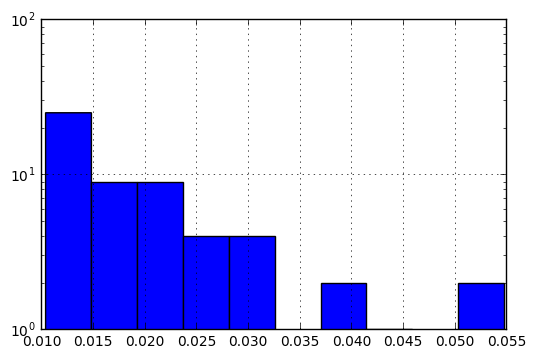

In [52]:
df_merged[(df_merged.degree_centrality > 0.01) & (df_merged.function=='p')].degree_centrality.hist(log=True)
None

[<a href="#top">Back to top</a>]

## How do I read in only a subset of the rows?

In [54]:
# specify how many rows to read
df_short = pd.read_table(pathToFile, nrows=3)
df_short

,node_id,BEL,aminoacid_Code_1,aminoacid_Code_2,function,list,modification,namespace,node_id.1,p_modType,position,undefined_namespace,valid_NSV,value
0,1,"a(CHEBI:""gamma-secretase inhibitor"")",NaN,NaN,a,NaN,NaN,CHEBI,1,NaN,NaN,NaN,NaN,gamma-secretase inhibitor
1,2,"complex(SCOMP:""gamma Secretase Complex"")",NaN,NaN,complex,NaN,NaN,SCOMP,2,NaN,NaN,NaN,NaN,"""gamma Secretase Complex"""
2,3,"p(HGNC:""BACE1"")",NaN,NaN,p,NaN,NaN,HGNC,3,NaN,NaN,NaN,True,BACE1


Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

## How do I iterate through a Series?

In [55]:
# Series are directly iterable (like a list)
for bel in df_short.BEL:
    print(bel)

a(CHEBI:"gamma-secretase inhibitor")
complex(SCOMP:"gamma Secretase Complex")
p(HGNC:"BACE1")


## How do I iterate through a DataFrame?

In [56]:
# various methods are available to iterate through a DataFrame
for index, row in df_short.iterrows():
    print(index, row.function, row.namespace, row.value)

0 a CHEBI gamma-secretase inhibitor
1 complex SCOMP "gamma Secretase Complex"
2 p HGNC BACE1


Documentation for [**`iterrows`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)

## How do I drop all non-numeric columns from a DataFrame?

In [63]:
# read a dataset into a DataFrame, and check the data types
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [64]:
# only include numeric columns in the DataFrame
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)